<a href="https://colab.research.google.com/github/DanielJohanKristian/UTS_G.231.21.0021_Daniel-Johan-Kristian/blob/main/UTS1_G231.21.0021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data = pd.read_csv('CarPrice_Assignment.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(205, 26)
['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [ ]:
data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

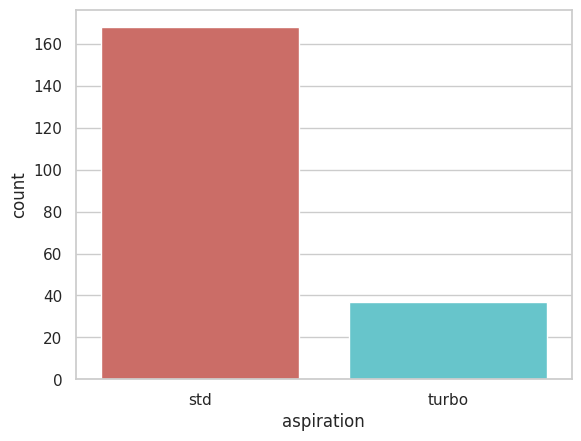

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.countplot(x='aspiration', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
data.groupby('aspiration').mean()

<ipython-input-7-cef5c1379505>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('aspiration').mean()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
aspiration,,,,,,,,,,,,,,,,
std,101.119048,0.869048,98.030357,172.694643,65.605952,53.625000,2476.369048,124.797619,3.302798,3.222679,9.592976,99.642857,5166.071429,25.839286,31.571429,12611.270833
turbo,111.540541,0.675676,102.054054,180.200000,67.278378,54.178378,2915.162162,136.486486,3.452162,3.404054,12.637838,124.432432,4939.189189,22.405405,27.027027,16298.166676


In [ ]:
data.groupby('carbody').mean()

<ipython-input-8-8ef9117eaa9f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('carbody').mean()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
carbody,,,,,,,,,,,,,,,,
convertible,94.666667,2.833333,92.700000,170.383333,65.583333,51.433333,2801.666667,157.166667,3.491667,3.043333,8.933333,131.666667,5158.333333,20.500000,26.000000,21890.500000
hardtop,125.875000,1.875000,98.500000,176.937500,66.612500,52.850000,2810.625000,176.250000,3.608750,3.322500,10.725000,142.250000,5031.250000,21.625000,27.250000,22208.500000
hatchback,93.842857,1.585714,95.535714,166.592857,65.247143,52.108571,2348.185714,114.400000,3.244571,3.278143,9.027429,101.171429,5230.714286,26.314286,32.171429,10376.652386
sedan,102.072917,0.333333,100.619792,177.585417,66.260417,54.337500,2610.593750,130.822917,3.338542,3.267292,10.937500,103.104167,5081.770833,25.322917,30.833333,14344.270833
wagon,126.880000,-0.160000,102.156000,181.304000,66.256000,56.728000,2784.240000,123.840000,3.406400,3.175600,10.316000,97.440000,5018.000000,24.040000,28.720000,12371.960000


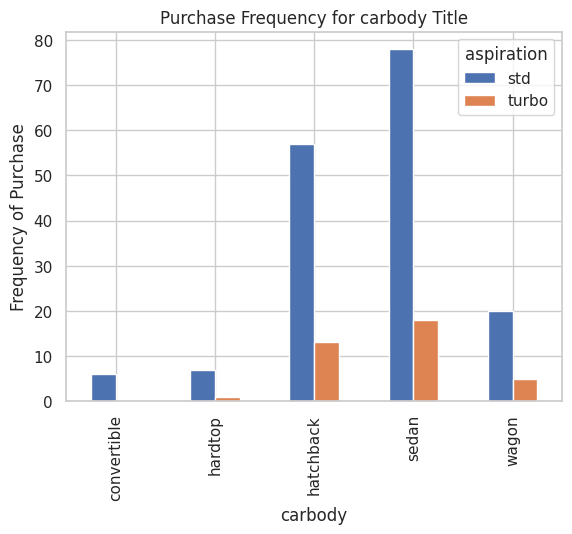

In [ ]:
%matplotlib inline
pd.crosstab(data.carbody,data.aspiration).plot(kind='bar')
plt.title('Purchase Frequency for carbody Title')
plt.xlabel('carbody')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_carbody')

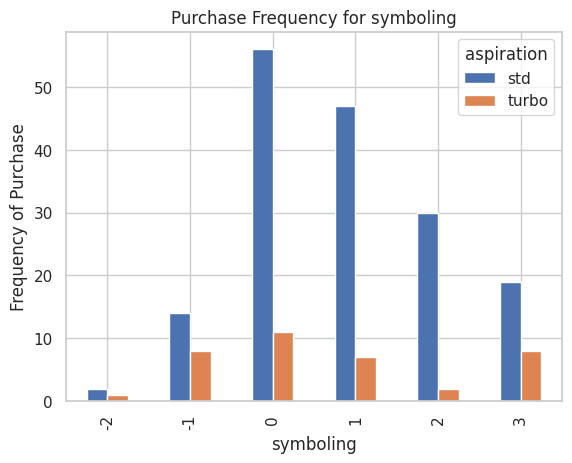

In [ ]:
pd.crosstab(data.symboling,data.aspiration).plot(kind='bar')
plt.title('Purchase Frequency for symboling')
plt.xlabel('symboling')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_symboling_bar')